# IMDB Movie Reviews 

In [47]:
import tensorflow
from tensorflow.keras.datasets import imdb 
from tensorflow.keras.preprocessing.sequence import pad_sequences 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.layers import Embedding 
from tensorflow.keras.callbacks import ModelCheckpoint  
import os 
from sklearn.metrics import roc_auc_score, roc_curve 
import pandas as pd
import matplotlib.pyplot as plt 

# Set hyperparameters

In [50]:
# output directory name:
output_dir = 'model_output/dense'

# training:
epochs = 4
batch_size = 128

# vector-space embedding: 
n_dim = 64
n_unique_words = 6000 
n_words_to_skip = 50 
max_review_length = 100
pad_type = trunc_type = 'pre'

# neural network architecture: 
n_dense = 64
dropout = 0.5

# Load data

Movie Dataset that is drawn from tensorflow dataset

In [51]:
(x_train, y_train), (x_valid, y_valid) = imdb.load_data(num_words=n_unique_words, 
                                                        skip_top=n_words_to_skip) 

In [7]:
x_train[0:6] # 0 padding; 1 starting character; 2 is unknown; 3 is most common word, etc.

array([list([2, 2, 2, 2, 2, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 2, 173, 2, 256, 2, 2, 100, 2, 838, 112, 50, 670, 2, 2, 2, 480, 284, 2, 150, 2, 172, 112, 167, 2, 336, 385, 2, 2, 172, 4536, 1111, 2, 546, 2, 2, 447, 2, 192, 50, 2, 2, 147, 2025, 2, 2, 2, 2, 1920, 4613, 469, 2, 2, 71, 87, 2, 2, 2, 530, 2, 76, 2, 2, 1247, 2, 2, 2, 515, 2, 2, 2, 626, 2, 2, 2, 62, 386, 2, 2, 316, 2, 106, 2, 2, 2223, 2, 2, 480, 66, 3785, 2, 2, 130, 2, 2, 2, 619, 2, 2, 124, 51, 2, 135, 2, 2, 1415, 2, 2, 2, 2, 215, 2, 77, 52, 2, 2, 407, 2, 82, 2, 2, 2, 107, 117, 2, 2, 256, 2, 2, 2, 3766, 2, 723, 2, 71, 2, 530, 476, 2, 400, 317, 2, 2, 2, 2, 1029, 2, 104, 88, 2, 381, 2, 297, 98, 2, 2071, 56, 2, 141, 2, 194, 2, 2, 2, 226, 2, 2, 134, 476, 2, 480, 2, 144, 2, 2, 2, 51, 2, 2, 224, 92, 2, 104, 2, 226, 65, 2, 2, 1334, 88, 2, 2, 283, 2, 2, 4472, 113, 103, 2, 2, 2, 2, 2, 178, 2]),
       list([2, 194, 1153, 194, 2, 78, 228, 2, 2, 1463, 4369, 2, 134, 2, 2, 715, 2, 118, 1634, 2, 394, 2, 2, 119, 954, 189, 102, 2, 20

In [53]:
#Length of each sentence for the first 10 sentences 
for x in x_train[0:11]:
    print(len(x))

218
189
141
550
147
43
123
562
233
130
450


In [54]:
#Labels 
y_train[0:11]

array([1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1], dtype=int64)

In [10]:
#Length of training set and valdation set 
len(x_train), len(x_valid)

(25000, 25000)

In [55]:
word_index = tensorflow.keras.datasets.imdb.get_word_index()
word_index = {k:(v+3) for k,v in word_index.items()}
word_index["PAD"] = 0
word_index["START"] = 1
word_index["UNK"] = 2

In [56]:
word_index

{'fawn': 34704,
 'tsukino': 52009,
 'nunnery': 52010,
 'sonja': 16819,
 'vani': 63954,
 'woods': 1411,
 'spiders': 16118,
 'hanging': 2348,
 'woody': 2292,
 'trawling': 52011,
 "hold's": 52012,
 'comically': 11310,
 'localized': 40833,
 'disobeying': 30571,
 "'royale": 52013,
 "harpo's": 40834,
 'canet': 52014,
 'aileen': 19316,
 'acurately': 52015,
 "diplomat's": 52016,
 'rickman': 25245,
 'arranged': 6749,
 'rumbustious': 52017,
 'familiarness': 52018,
 "spider'": 52019,
 'hahahah': 68807,
 "wood'": 52020,
 'transvestism': 40836,
 "hangin'": 34705,
 'bringing': 2341,
 'seamier': 40837,
 'wooded': 34706,
 'bravora': 52021,
 'grueling': 16820,
 'wooden': 1639,
 'wednesday': 16821,
 "'prix": 52022,
 'altagracia': 34707,
 'circuitry': 52023,
 'crotch': 11588,
 'busybody': 57769,
 "tart'n'tangy": 52024,
 'burgade': 14132,
 'thrace': 52026,
 "tom's": 11041,
 'snuggles': 52028,
 'francesco': 29117,
 'complainers': 52030,
 'templarios': 52128,
 '272': 40838,
 '273': 52031,
 'zaniacs': 52133,

In [57]:
#Making the key be the integers
index_word = {v:k for k,v in word_index.items()}

In [58]:
x_train[0]

[2,
 2,
 2,
 2,
 2,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 2,
 173,
 2,
 256,
 2,
 2,
 100,
 2,
 838,
 112,
 50,
 670,
 2,
 2,
 2,
 480,
 284,
 2,
 150,
 2,
 172,
 112,
 167,
 2,
 336,
 385,
 2,
 2,
 172,
 4536,
 1111,
 2,
 546,
 2,
 2,
 447,
 2,
 192,
 50,
 2,
 2,
 147,
 2025,
 2,
 2,
 2,
 2,
 1920,
 4613,
 469,
 2,
 2,
 71,
 87,
 2,
 2,
 2,
 530,
 2,
 76,
 2,
 2,
 1247,
 2,
 2,
 2,
 515,
 2,
 2,
 2,
 626,
 2,
 2,
 2,
 62,
 386,
 2,
 2,
 316,
 2,
 106,
 2,
 2,
 2223,
 5244,
 2,
 480,
 66,
 3785,
 2,
 2,
 130,
 2,
 2,
 2,
 619,
 2,
 2,
 124,
 51,
 2,
 135,
 2,
 2,
 1415,
 2,
 2,
 2,
 2,
 215,
 2,
 77,
 52,
 2,
 2,
 407,
 2,
 82,
 2,
 2,
 2,
 107,
 117,
 5952,
 2,
 256,
 2,
 2,
 2,
 3766,
 2,
 723,
 2,
 71,
 2,
 530,
 476,
 2,
 400,
 317,
 2,
 2,
 2,
 2,
 1029,
 2,
 104,
 88,
 2,
 381,
 2,
 297,
 98,
 2,
 2071,
 56,
 2,
 141,
 2,
 194,
 2,
 2,
 2,
 226,
 2,
 2,
 134,
 476,
 2,
 480,
 2,
 144,
 2,
 5535,
 2,
 51,
 2,
 2,
 224,
 92,
 2,
 104,
 2,
 226,
 65,
 2,
 2,
 1334

In [59]:
#Looking at like character strings
' '.join(index_word[id] for id in x_train[0])

"UNK UNK UNK UNK UNK brilliant casting location scenery story direction everyone's really suited UNK part UNK played UNK UNK could UNK imagine being there robert UNK UNK UNK amazing actor UNK now UNK same being director UNK father came UNK UNK same scottish island UNK myself UNK UNK loved UNK fact there UNK UNK real connection UNK UNK UNK UNK witty remarks throughout UNK UNK were great UNK UNK UNK brilliant UNK much UNK UNK bought UNK UNK UNK soon UNK UNK UNK released UNK UNK UNK would recommend UNK UNK everyone UNK watch UNK UNK fly fishing UNK amazing really cried UNK UNK end UNK UNK UNK sad UNK UNK know what UNK say UNK UNK cry UNK UNK UNK UNK must UNK been good UNK UNK definitely UNK also UNK UNK UNK two little boy's UNK played UNK UNK UNK norman UNK paul UNK were UNK brilliant children UNK often left UNK UNK UNK UNK list UNK think because UNK stars UNK play them UNK grown up UNK such UNK big UNK UNK UNK whole UNK UNK these children UNK amazing UNK should UNK praised UNK what UNK U

In [60]:
#Looking at how it looked like before removal of stopwords, how much of a difference does it actually make. 
(all_x_train,_),(all_x_valid,_) = imdb.load_data() 

In [62]:
' '.join(index_word[id] for id in all_x_train[0])

"START this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert redford's is an amazing actor and now the same being director norman's father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for retail and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also congratulations to the two little boy's that played the part's of norman and paul they were just brilliant children are often left out of the praising list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and shou

### Preprocess data

In [63]:
#Using pad sequencing method so that all our reviews are of the same length which is 100 
x_train = pad_sequences(x_train, maxlen=max_review_length, 
                        padding=pad_type, truncating=trunc_type, value=0)
x_valid = pad_sequences(x_valid, maxlen=max_review_length, 
                        padding=pad_type, truncating=trunc_type, value=0)

In [64]:
x_train[0:6]

array([[1415,    2,    2,    2,    2,  215,    2,   77,   52,    2,    2,
         407,    2,   82,    2,    2,    2,  107,  117, 5952,    2,  256,
           2,    2,    2, 3766,    2,  723,    2,   71,    2,  530,  476,
           2,  400,  317,    2,    2,    2,    2, 1029,    2,  104,   88,
           2,  381,    2,  297,   98,    2, 2071,   56,    2,  141,    2,
         194,    2,    2,    2,  226,    2,    2,  134,  476,    2,  480,
           2,  144,    2, 5535,    2,   51,    2,    2,  224,   92,    2,
         104,    2,  226,   65,    2,    2, 1334,   88,    2,    2,  283,
           2,    2, 4472,  113,  103,    2,    2,    2, 5345,    2,  178,
           2],
       [ 163,    2, 3215,    2,    2, 1153,    2,  194,  775,    2,    2,
           2,  349, 2637,  148,  605,    2,    2,    2,  123,  125,   68,
           2,    2,    2,  349,  165, 4362,   98,    2,    2,  228,    2,
           2,    2, 1157,    2,  299,  120,    2,  120,  174,    2,  220,
         175,  136,   5

In [65]:
for x in x_train[0:6]:
    print(len(x))

100
100
100
100
100
100


In [66]:
' '.join(index_word[id] for id in x_train[0])

"cry UNK UNK UNK UNK must UNK been good UNK UNK definitely UNK also UNK UNK UNK two little boy's UNK played UNK UNK UNK norman UNK paul UNK were UNK brilliant children UNK often left UNK UNK UNK UNK list UNK think because UNK stars UNK play them UNK grown up UNK such UNK big UNK UNK UNK whole UNK UNK these children UNK amazing UNK should UNK praised UNK what UNK UNK done don't UNK think UNK whole story UNK UNK lovely because UNK UNK true UNK UNK someone's life after UNK UNK UNK shared UNK us UNK"

In [67]:
' '.join(index_word[id] for id in x_train[5])

'PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD UNK begins better than UNK ends funny UNK UNK russian UNK crew UNK UNK other actors UNK UNK those scenes where documentary shots UNK UNK spoiler part UNK message UNK UNK contrary UNK UNK whole story UNK UNK does UNK UNK UNK UNK'

#### Design neural network architecture

In [68]:
model = Sequential()
# first hidden layer:
model.add(Embedding(n_unique_words, n_dim, input_length=max_review_length))
model.add(Flatten())

#second hidden layer 
model.add(Dense(n_dense, activation='relu'))
model.add(Dropout(dropout))

#third hidden layer 
model.add(Dense(n_dense, activation='relu'))
model.add(Dropout(dropout))

#Output layer 
model.add(Dense(1, activation='sigmoid')) # 

In [69]:
model.summary() # so many parameters!

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 64)           384000    
_________________________________________________________________
flatten_1 (Flatten)          (None, 6400)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                409664    
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                

In [70]:
# embedding layer dimensions and parameters: 
n_dim, n_unique_words, n_dim*n_unique_words

(64, 6000, 384000)

In [71]:
# ...flatten:
max_review_length, n_dim, n_dim*max_review_length

(100, 64, 6400)

In [72]:
# ...dense:
n_dense, n_dim*max_review_length*n_dense + n_dense # weights + biases

(64, 409664)

In [73]:
# ...and output:
n_dense + 1 

65

## Configure model

In [74]:
model.compile(loss='binary_crossentropy', optimizer='nadam', metrics=['accuracy'])

In [75]:
modelcheckpoint = ModelCheckpoint(filepath=output_dir+
                                  "/weights.{epoch:02d}.hdf5")

In [76]:
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

#### Train!

In [77]:
model.fit(x_train, y_train, 
          batch_size=batch_size, epochs=epochs, verbose=1, 
          validation_data=(x_valid, y_valid), 
          callbacks=[modelcheckpoint])

Train on 25000 samples, validate on 25000 samples
Epoch 1/4
25000/25000 [==============================] - 8s 301us/sample - loss: 0.5828 - accuracy: 0.6553 - val_loss: 0.3575 - val_accuracy: 0.8397
Epoch 2/4
25000/25000 [==============================] - 5s 191us/sample - loss: 0.2946 - accuracy: 0.8848 - val_loss: 0.3642 - val_accuracy: 0.8406
Epoch 3/4
25000/25000 [==============================] - 5s 185us/sample - loss: 0.1110 - accuracy: 0.9636 - val_loss: 0.5450 - val_accuracy: 0.8242
Epoch 4/4
25000/25000 [==============================] - 5s 201us/sample - loss: 0.0295 - accuracy: 0.9914 - val_loss: 0.7446 - val_accuracy: 0.8249


best epoch was on the second epoch 

#### Evaluate

In [78]:
model.load_weights(output_dir+"/weights.02.hdf5") # NOT zero-indexed

In [79]:
y_hat = model.predict_proba(x_valid)

In [80]:
y_hat[0]

array([0.17244406], dtype=float32)

In [81]:
len(y_hat)

25000

In [82]:
#Our model is predicting that it is going to be a negative review 
y_hat[0]

array([0.17244406], dtype=float32)

In [83]:
#When check that is exactly what it is 
y_valid[0]

0

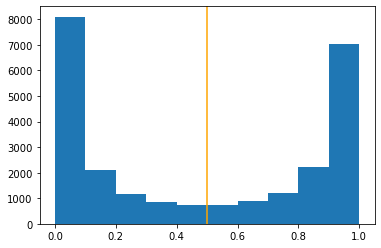

In [88]:
#Plot of our models ablity confidently predict if its a negative or positive review 
plt.hist(y_hat)
_ = plt.axvline(x=0.5, color='orange')

In [89]:
pct_auc = roc_auc_score(y_valid, y_hat)*100.0

In [90]:
#Area under the curve value of 92.34 which is excellent 
"{:0.2f}".format(pct_auc)

'92.34'

In [92]:
#Getting y_hat values and appendng it to the empty list 
float_y_hat = []
for y in y_hat:
    float_y_hat.append(y[0])

In [93]:
#Creation of Datafram that will have the confidence that our model has and the current classification of the review
ydf = pd.DataFrame(list(zip(float_y_hat, y_valid)), columns=['y_hat', 'y'])

In [95]:
#The first ten are all currently classified
ydf.head(10)

,y_hat,y
0,0.172444,0
1,0.985338,1
2,0.688567,1
3,0.210686,0
4,0.995933,1
5,0.872505,1
6,0.834126,1
7,0.008363,0
8,0.851635,0
9,0.833169,1


In [96]:

' '.join(index_word[id] for id in all_x_valid[0])

"START please give this one a miss br br kristy swanson and the rest of the cast rendered terrible performances the show is flat flat flat br br i don't know how michael madison could have allowed this one on his plate he almost seemed to know this wasn't going to work out and his performance was quite lacklustre so all you madison fans give this a miss"

In [104]:
' '.join(index_word[id] for id in all_x_valid[6]) 

"START originally supposed to be just a part of a huge epic the year 1905 depicting the revolution of 1905 potemkin is the story of the mutiny of the crew of the potemkin in odessa harbor the film opens with the crew protesting meat and the captain ordering the execution of the an uprising takes place during which the revolutionary leader is killed this crewman is taken to the shore to lie in state when the townspeople gather on a huge flight of steps overlooking the harbor czarist troops appear and march down the steps breaking up the crowd a naval squadron is sent to retake the potemkin but at the moment when the ships come into range their crews allow the to pass through eisenstein's non historically accurate ending is open ended thus indicating that this was the seed of the later bolshevik revolution that would bloom in russia the film is broken into five parts men and maggots drama on the an appeal from the dead the odessa steps and meeting the squadron br br eisenstein was a revo

In [98]:
#instances of false postives 
ydf[(ydf.y == 0) & (ydf.y_hat > 0.9)].head(10)

,y_hat,y
66,0.930157,0
75,0.938662,0
112,0.965207,0
152,0.944171,0
256,0.913609,0
299,0.955496,0
386,0.943326,0
547,0.916777,0
693,0.965442,0
740,0.972899,0


In [99]:
' '.join(index_word[id] for id in all_x_valid[547]) 

"START stupid government once again attempted to create an inexhaustible and indestructible soldier and of course the experiments went terribly wrong burdening us with a half man half mutant who pukes an awful lot and squeaks like a little girl whenever he's upset lance henriksen stars as the honest scientist who immediately quit the experiment upon hearing it was a military project but he returns bringing the whole family with him when he finds out his beloved guinea pig has gone on a killing spree mind ripper certainly is a watchable horror movie but it's very unoriginal and features pretty much every lame cliché you can think off including the estranged father rebellious teenage son sub plot yawn the characters are like wooden puppets the dumbest things are being said and done and there's a completely pointless dream sequence coming from the monster there's a handful of interesting gory scenes to enjoy and some of the isolated desert locations are effectively eerie lance henriksen i

In [102]:
ydf[(ydf.y == 1) & (ydf.y_hat < 0.1)].head(10)

,y_hat,y
100,0.043532,1
101,0.025328,1
224,0.024164,1
300,0.028796,1
322,0.040529,1
325,0.030092,1
333,0.074481,1
345,0.013363,1
355,0.033482,1
402,0.060569,1


In [103]:
' '.join(index_word[id] for id in all_x_valid[402]) 

'START i bought this in the budget department last week i had halloween and halloween ii already and since i aim to collect every horror film ever i chose this after all the 1st two were good br br this film is pretty intelligent to tell the truth it seems to create the correct atmosphere and has a nice history of michael myers it uses the old locations from the original and the main character is the kid whom laurie strode babysat that fateful halloween in 1978 br br the climax also is fairly satisfying anyways it is a lot better than h20 which frankly is absolute crap'